In [1]:
import warnings; warnings.filterwarnings("ignore")

In [23]:
from IPython import display as disp
import librosa
import soundfile as sf
import os
import librosa.display

In [39]:
import sys
sys.path.append('..')

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline  

## vis utils

In [4]:
def plot_waveform(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    return librosa.display.waveshow(wav, sr=sr, ax=ax)

def plot_mel(wav: np.ndarray, sr: int, label: str = None, figsize=(20, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    if label:
        fig.suptitle(label, fontsize=16)
    S = librosa.feature.melspectrogram(y=wav, sr=sr)
    return librosa.display.specshow(librosa.power_to_db(S, ref=np.max), ax=ax)

## EDA

In [5]:
DATA_PATH = '/mnt/data/yandex_speech2text_data/'

In [6]:
df = pd.read_csv(f'{DATA_PATH}/df.csv') 

In [7]:
df.head(3)

,text,audio_id,worker_id,status,version,pool_id,task_id,path,duration,frames,rate
0,"По его словам, на вчерашний вечер у Донбанка «...",2e5fc762-6b7c-4168-8dfd-44e90e908de3,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/2e5fc762-6b7c-4168-8dfd-44e90e908d...,13.02,208320.0,16000.0
1,"Этот процесс так захватывает человека, что он ...",93b47a6a-504c-41e8-b420-1ed5b8360d0d,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/93b47a6a-504c-41e8-b420-1ed5b8360d...,15.02,240320.0,16000.0
2,Это крупнейшее левое движение Западного полуша...,19588ca3-9249-43cd-bc55-374432dffdbd,bd83ddb2596e455951c3838ed9061b84,APPROVED,1,12233816,0000baac58--5e813e8b44e47001255de14a,audio_files/19588ca3-9249-43cd-bc55-374432dffd...,15.48,247680.0,16000.0


In [8]:
df.text.sample(10)

108795    Эта электронная подпись имеет значение между с...
94676     Это зависит от ваших знаний испанского языка д...
19244     Люди спокойно поговорили, повспоминали, выпили...
110067    Эта карта, которую вы используете каждый день ...
63671     Однако молодой человек инвалид с детства и его...
15296     И это является очень большой проблемой для них...
106312    Нажмите на стрелку, чтобы увидеть страницу «Br...
28303     Договоренность о проведении форума в Геленджик...
34876     В настоящее время помещения Главпочтамта обсле...
103182    В этом контексте, Жан-Пьер Giran чувствовал се...
Name: text, dtype: object

In [9]:
df.duration.describe()

count    118000.000000
mean          6.871746
std           1.927652
min           0.069250
25%           5.500000
50%           6.600000
75%           7.964062
max          22.060000
Name: duration, dtype: float64

In [10]:
df.groupby('worker_id').size().describe()

count      66.000000
mean     1787.878788
std       853.213861
min       320.000000
25%      1000.000000
50%      2000.000000
75%      2030.000000
max      4000.000000
dtype: float64

In [11]:
df.status.value_counts(1)

APPROVED    0.707119
REJECTED    0.292881
Name: status, dtype: float64

In [12]:
sample = df.sample()

In [13]:
df = df[df.status == 'APPROVED'].sample(1000)

In [14]:
path = f"{DATA_PATH}/{sample['path'].item()}"

In [15]:
disp.display(disp.Audio(path))
print(sample['text'].item())

Люди, находившиеся в салоне, оказались зажаты между кусками покореженного металла.


In [16]:
wav, sr = librosa.load(path)

In [17]:
mel = librosa.feature.melspectrogram(y=wav, sr=sr)

In [18]:
res = librosa.feature.inverse.mel_to_audio(mel, 
                                           sr=sr,
                                           hop_length=512, 
                                           win_length=None, 
                                           window='hann', 
                                           center=True, 
                                           pad_mode='constant', 
                                           power=1.0, 
                                           n_iter=32,
                                          )

In [19]:
# step4 - save it as a wav file
import soundfile as sf
sf.write("data/back_to_wav.wav", res, sr)

In [20]:
disp.display(disp.Audio('data/back_to_wav.wav'))

In [21]:
wav.shape

(151032,)

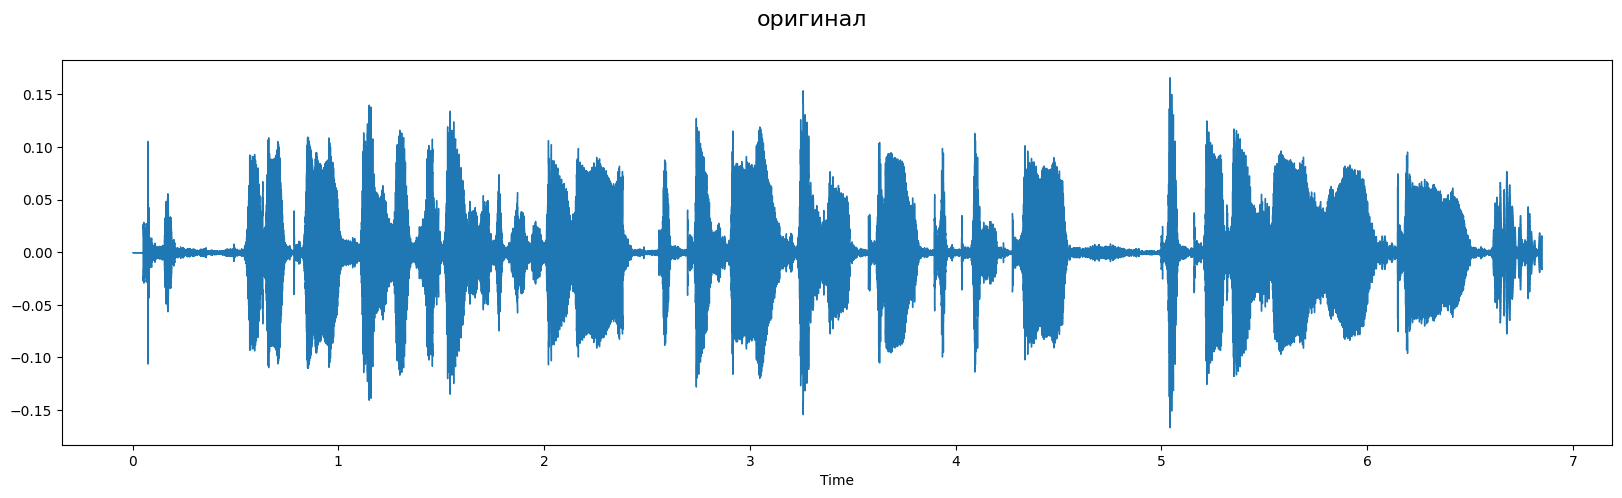

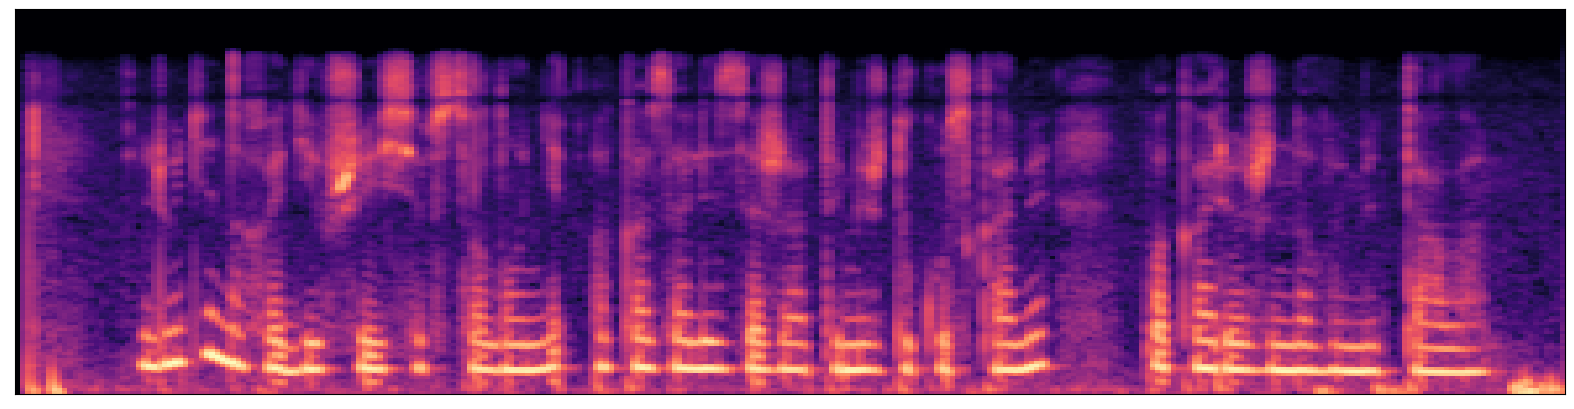

In [24]:
plot_waveform(wav, sr, 'оригинал')
plot_mel(wav, sr)

## white noise

In [25]:
def add_white_noise(signal, noise_percentage_factor=0.2):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [26]:
noised_wav = add_white_noise(wav)
noised_audio_path = 'noised.wav'
sf.write(noised_audio_path, noised_wav, sr)
disp.display(disp.Audio(noised_audio_path))

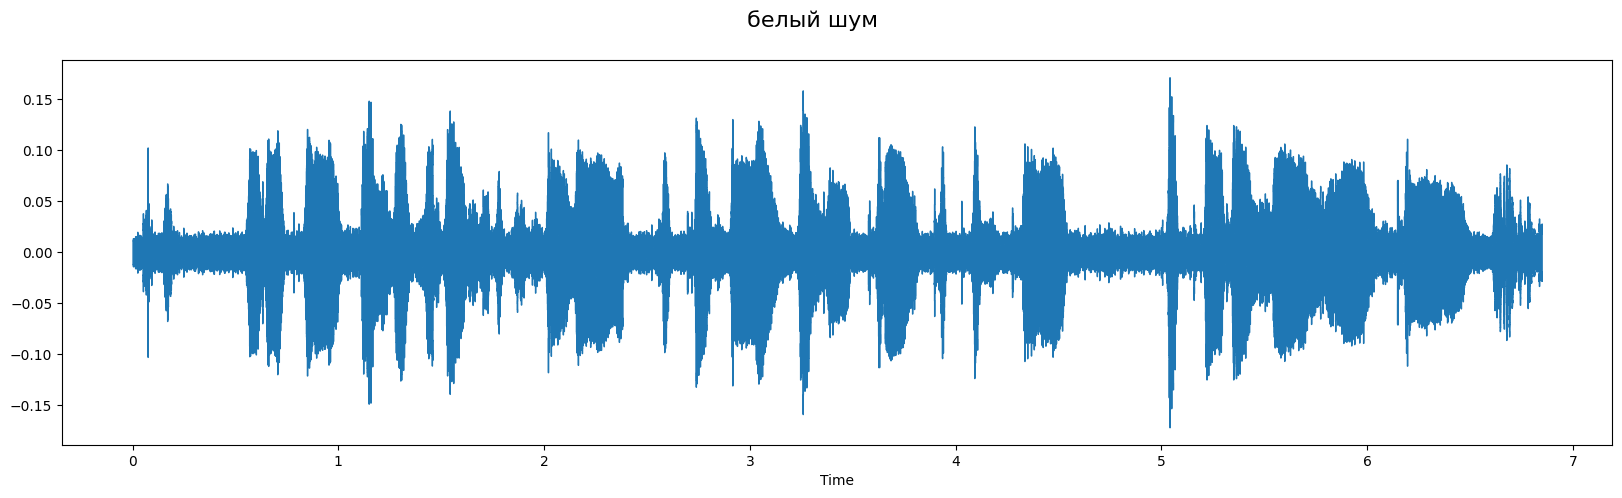

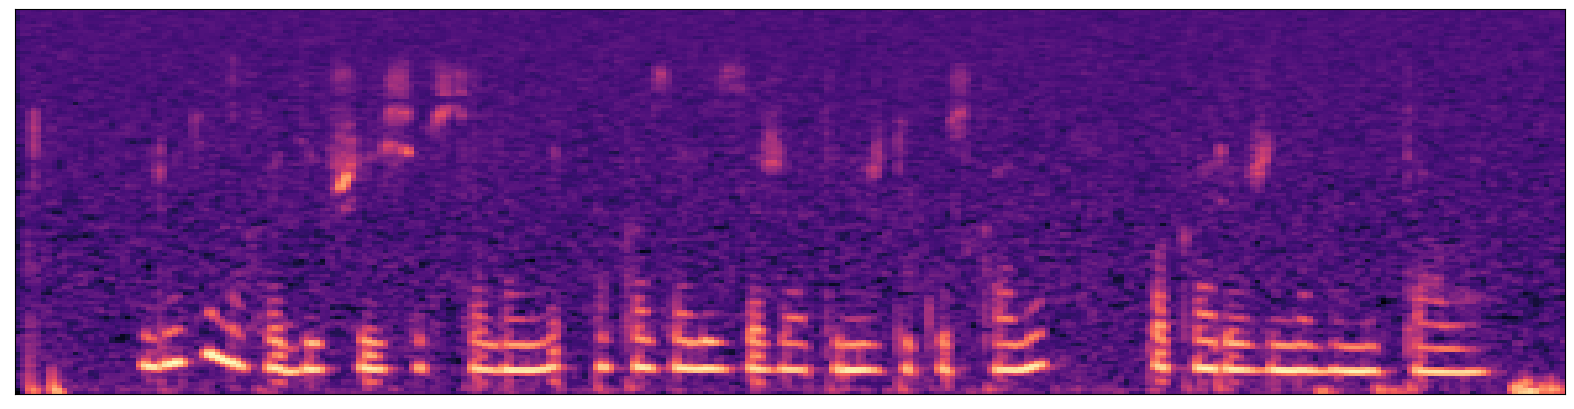

In [27]:
plot_waveform(noised_wav, sr, 'белый шум')
plot_mel(noised_wav, sr)

## prerecorded noise

In [28]:
sounds_path='../dataset/sounds/'

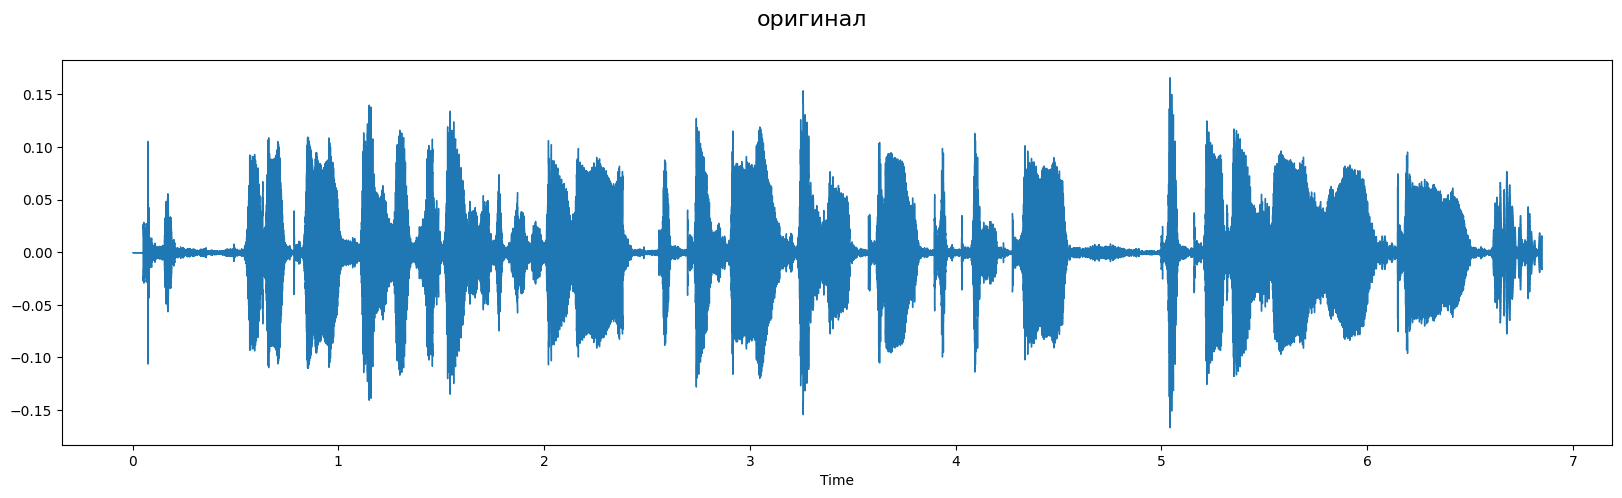

NameError: name 'AddBackgroundNoise' is not defined

In [29]:
sound_names = os.listdir(sounds_path)
plot_waveform(wav, sr, label='оригинал')
disp.display(disp.Audio(path))
plt.show()
for sound_name in sound_names:
    aug_func = AddBackgroundNoise(
        sounds_path=f"{sounds_path}/{sound_name}",
        min_snr_in_db=1/2.0,
        max_snr_in_db=2.0,
        noise_transform=PolarityInversion(),
        p=1.0
    )
    auged_wav = aug_func(wav, sr)
    auged_audio_path = f'auged_{sound_name}'
    sf.write(auged_audio_path, auged_wav, sr)
    print(sound_name)
    disp.display(disp.Audio(auged_audio_path))
    plot_waveform(auged_wav, sr, sound_name.split('.')[0])
    plt.show()

In [ ]:
%%timeit
wav, sr = librosa.load(path)
auged_wav = add_backgroud_noise(wav, sr)
sf.write('a.wav', auged_wav, sr)

In [30]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, AddBackgroundNoise, PolarityInversion

aug_pipeline = Compose([
    AddGaussianNoise(
        min_amplitude=0.005,
        max_amplitude=0.015,
        p=0.5
    ),
    AddBackgroundNoise(
        sounds_path=f"{sounds_path}",
        min_snr_in_db=1/2.0,
        max_snr_in_db=2.0,
        noise_transform=PolarityInversion(),
        p=1.0,
    )
])

In [35]:
SAVE_DIR = '../dataset'
clean_prefix = 'clean'
noisy_prefix = 'noisy'
os.makedirs(f'{SAVE_DIR}/{clean_prefix}', exist_ok=True)
os.makedirs(f'{SAVE_DIR}/{noisy_prefix}', exist_ok=True)

In [36]:
from tqdm import tqdm
format_i = f"0{int(np.ceil(np.log10(len(df)))) + 1}d"

for i, fname in tqdm(enumerate(df.path.values), total=len(df)):
    path = f'{DATA_PATH}/{fname}'
    
    wav, sr = librosa.load(path)
    
    new_path_clean = f'{SAVE_DIR}/{clean_prefix}/{format(i, format_i)}.wav'
    new_path_noisy = f'{SAVE_DIR}/{noisy_prefix}/{format(i, format_i)}.wav'
    
    auged_wav = aug_pipeline(wav, sr)
    sf.write(new_path_clean, wav, sr)
    sf.write(new_path_noisy, auged_wav, sr)

100%|█████████████████████████████████████████████████████| 1000/1000 [15:55<00:00,  1.05it/s]
